In [8]:
import numpy as np
import matplotlib.pyplot as pl
from mpmath import exp as mpexp

class State:
    
    def __init__(self,N,joined,left):
        self.N = N
        self.joined = joined
        self.left = left
        
    def __str__(self):
        return "{N=%s\njoined=%s\nleft=%s}" %(self.N,self.joined,self.left)

class Population:
    
    def __init__(self,N0,K,r):
        self.K = K
        self.r = r
        self.history = [State(N0,0,0)]
        self.relation = {}
        
    def addRelation(self,rels):
        self.relation = rels
        
    def update(self):
        '''This is some bad programming practice since the function should be called only from the World class
        Calling it individually with the object would break everything down. So, my bad...'''
        getOutFlux = lambda N, perc : N*perc/100
#         getOutFlux = lambda N, perc : int(N*perc*np.random.random()/100)
#         getOutFlux = lambda N, perc: np.random.randint(0,int(N*perc/100)+1)
        Ni = self.history[-2].N
        Nf = Ni*np.exp(self.r*(1-Ni/self.K))
        for pop in self.relation.keys():
            perc = self.relation[pop]
            out = getOutFlux(Ni,perc)
            self.history[-1].left += out
            pop.history[-1].joined += out
        self.history[-1].N += (Nf - self.history[-1].left)
        
    def getLastHundred(self):
        return [state.N for state in self.history[-101:-1]]
    
    def getAllPop(self):
        return [state.N for state in self.history]
        
    def plotHistory(self):
        time = range(0,len(self.history))
        N = self.getAllPop()
        out = [state.left for state in self.history]
        pl.figure(figsize=(40,20))
        pl.plot(time,N)
        pl.xlabel("Number of Generation",fontsize=40)
        pl.ylabel("Population",fontsize=40)
        pl.xticks(fontsize=40)
        pl.yticks(fontsize=40)
        pl.show()
        pl.figure(figsize=(40,20))
        pl.plot(time,out)
        pl.ylabel("Individuals moving out",fontsize=40)
        pl.xlabel("Number of generation",fontsize=40)
        pl.xticks(fontsize=40)
        pl.yticks(fontsize=40)
        pl.show()

class World:
    
    def __init__(self,pops,timeLim):
        self.pops = pops
        self.timeLim = timeLim
    
    def runSim(self):
        pops = self.pops
        timeLim = self.timeLim
        for i in range(1,timeLim):
            for j in pops:
                j.history.append(State(0,0,0))
            for j in pops:
                j.update()
            for j in pops:
                j.history[-1].N += j.history[-1].joined
    
    def getLastHundred(self):
        N = np.array(self.pops[0].getLastHundred())
        for i in self.pops[1:]:
            N = N + np.array(i.getLastHundred())
        return N
                
    def plotHistory(self):
        N = self.getLastHundred()
        t = range(0,len(self.pops[0].history))
        pl.figure(figsize=(40,20))
        pl.plot(t,N)
        pl.xlabel("Number of generations",fontsize=40)
        pl.ylabel("Number of individuals",fontsize=40)
        pl.xticks(fontsize=40)
        pl.yticks(fontsize=40)

In [9]:
import copy
def getBifurcationDiagram(K,popsList,rmax=2.5):
    worldFig = pl.figure(figsize=(40,20))
    worldAx = worldFig.add_subplot()
    worldAx.set_xlabel("r",fontsize=30)
    worldAx.set_ylabel("N",fontsize=30)
    worldAx.set_title("World",fontsize=30)
    pl.xticks(fontsize=30)
    pl.yticks(fontsize=30)
    popAx = []
    popFig = []
    for i in range(0,len(popsList)):
        popFig.append(pl.figure(figsize=(40,20)))
        popAx.append(popFig[-1].add_subplot())
        popAx[-1].set_xlabel("r",fontsize=30)
        popAx[-1].set_ylabel("N",fontsize=30)
        popAx[-1].set_title("Population "+str(i+1),fontsize=30)
        pl.xticks(fontsize=30)
        pl.yticks(fontsize=30)
    rList = np.arange(0.1,rmax,0.01)
    popsListAtDiffRs = []
    for r in rList:
        N = np.zeros(100)
        popsListAtR = copy.deepcopy(popsList)
        popsListAtDiffRs.append(popsListAtR)
        for pop in popsListAtR:
            pop.r = r
        world = World(popsListAtR,1000)
        world.runSim()
        rArray = r*np.ones(100)
        for i in range(0,len(popsList)):
            popIHundred = np.array(popsListAtR[i].getLastHundred())
            N = N + popIHundred
            popAx[i].scatter(rArray,popIHundred,color="red")
        worldAx.scatter(rArray,N,color="red")
    return popsListAtDiffRs

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars


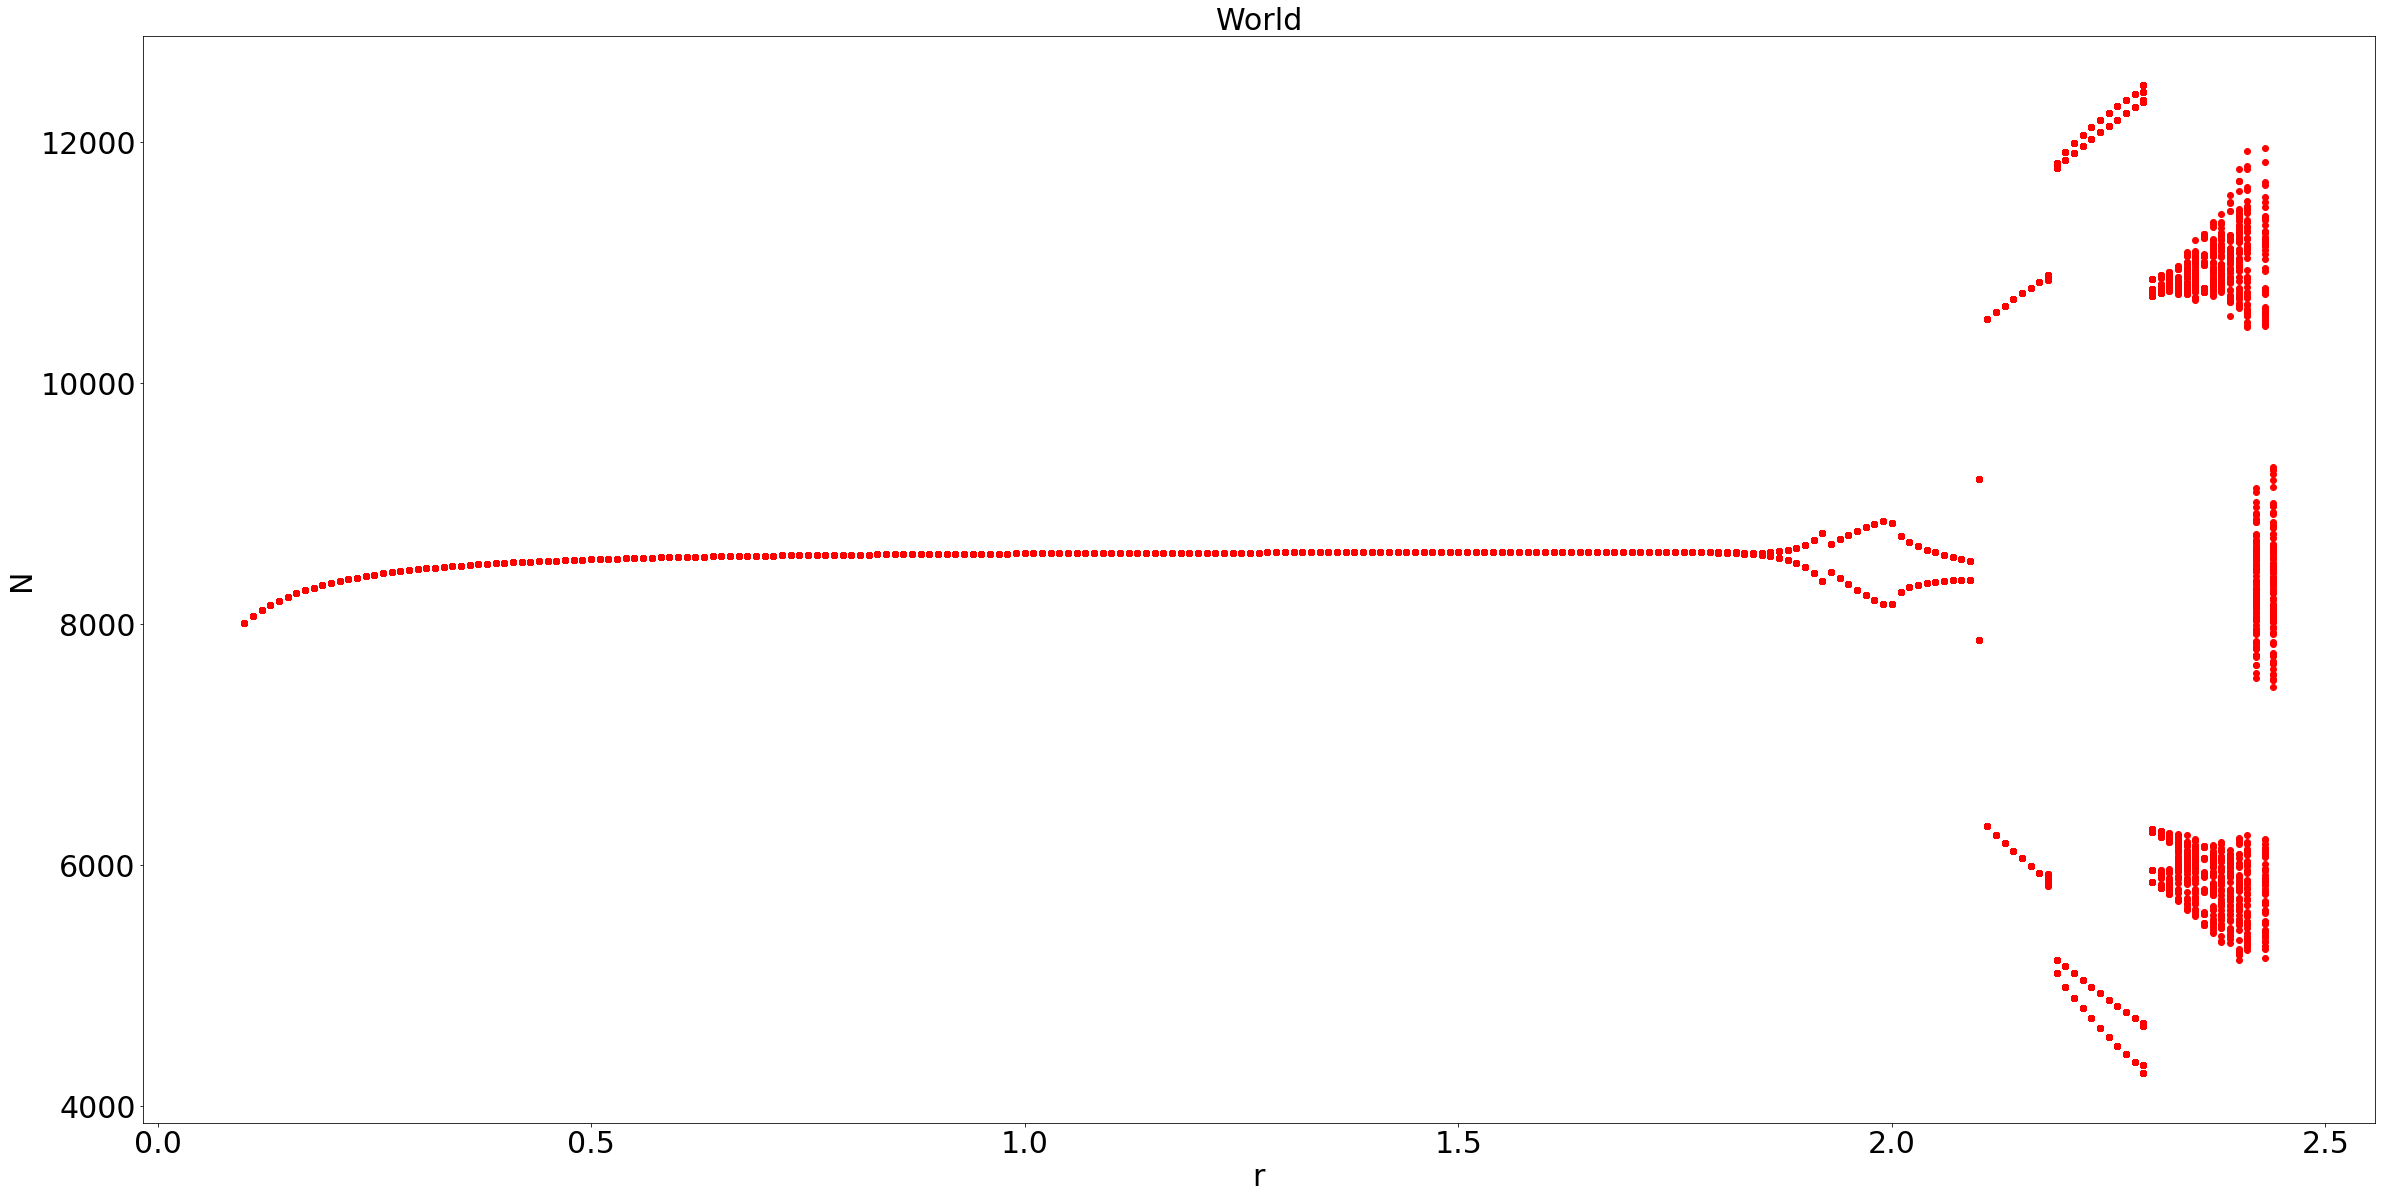

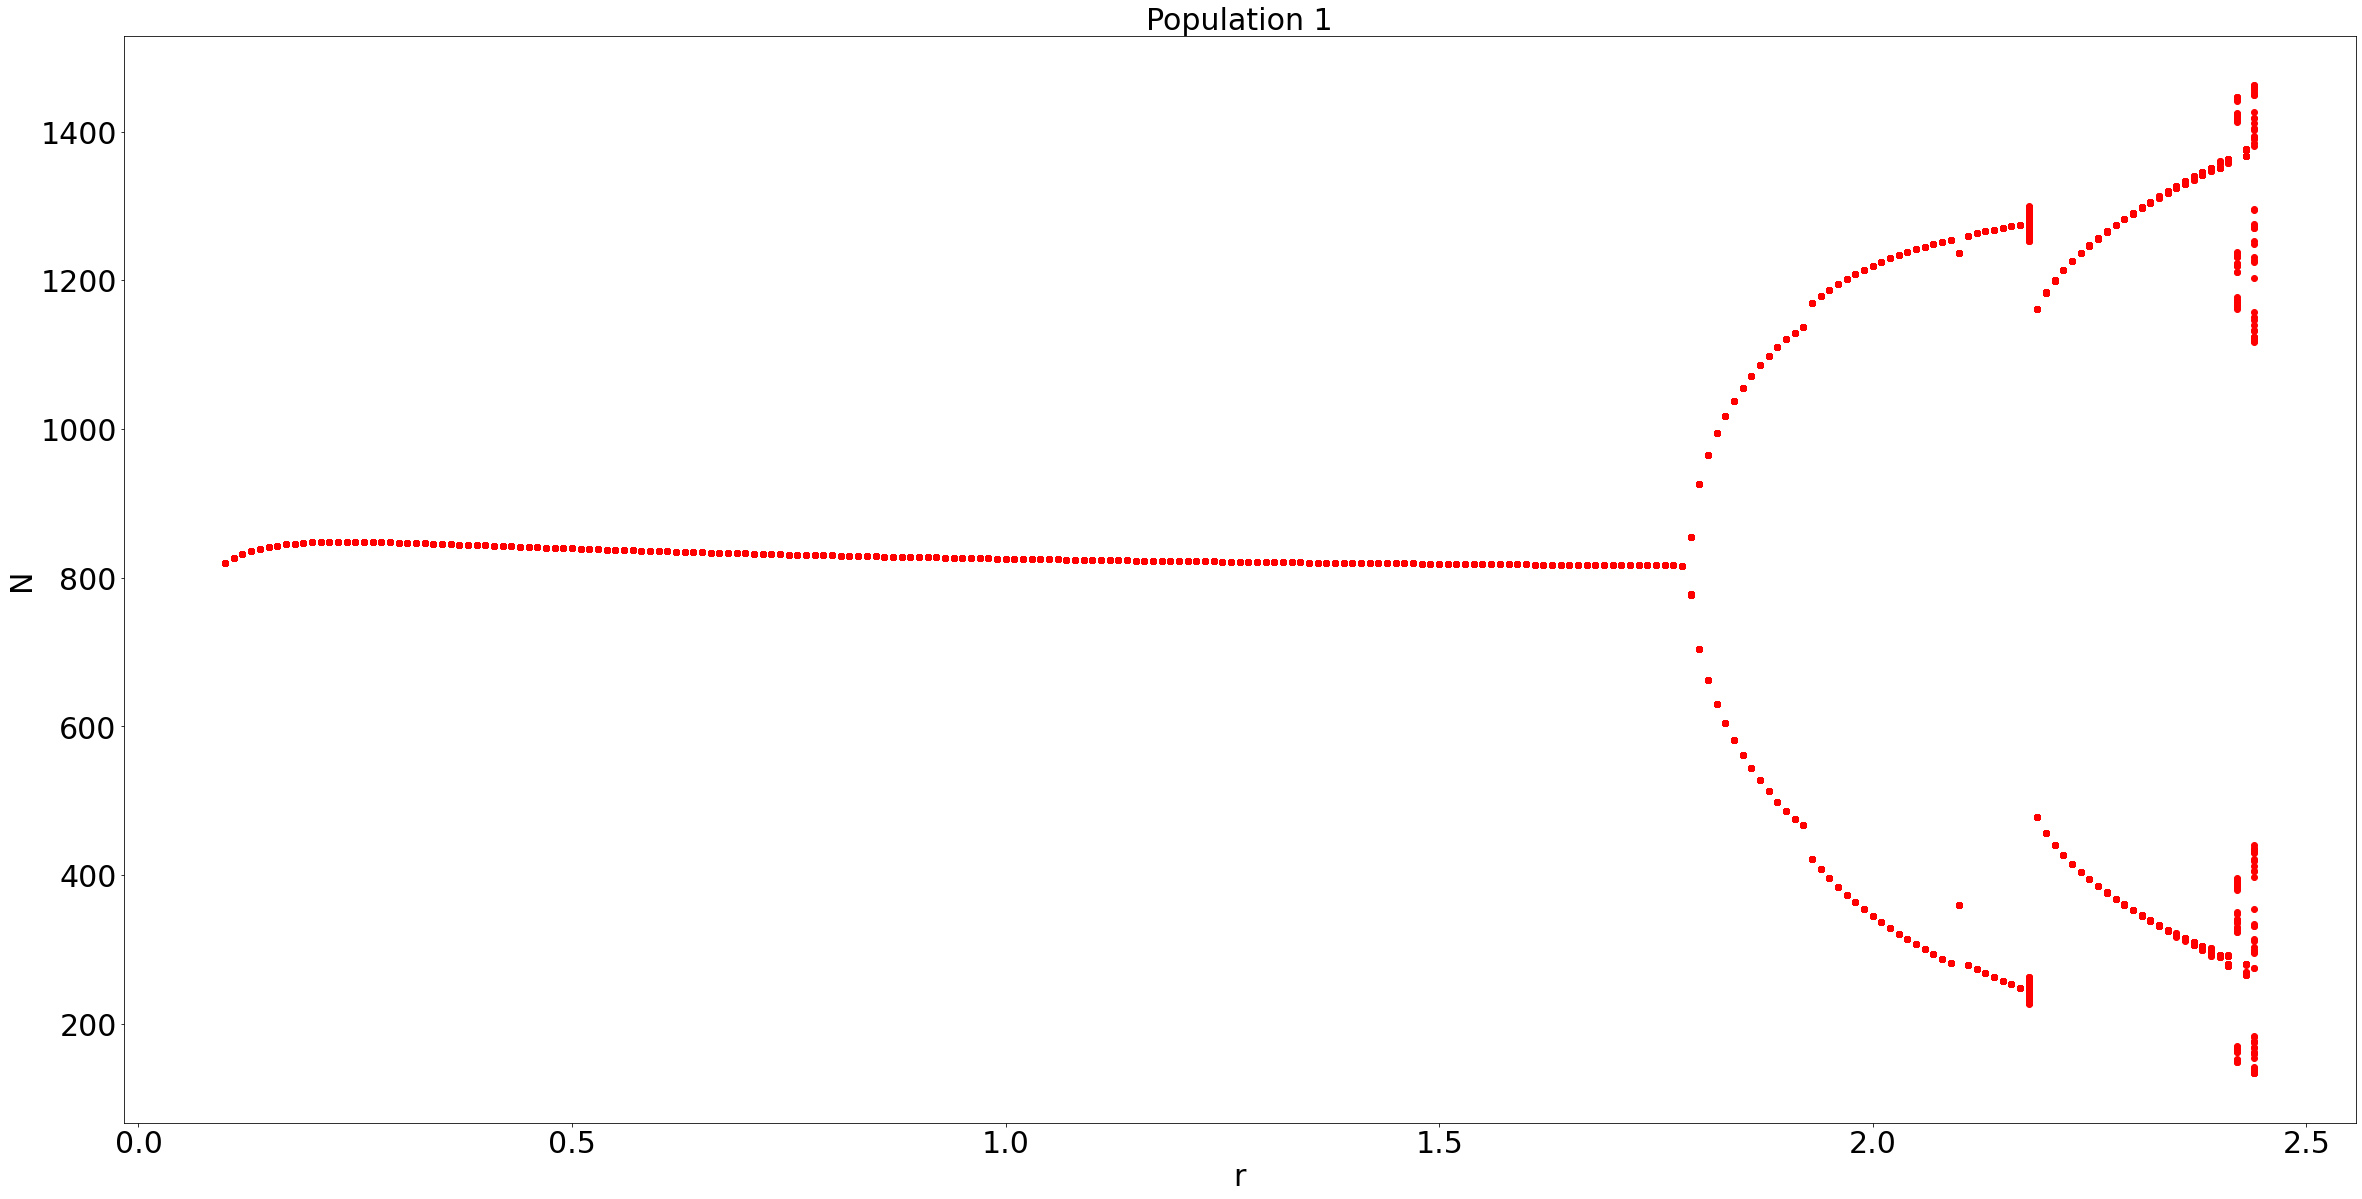

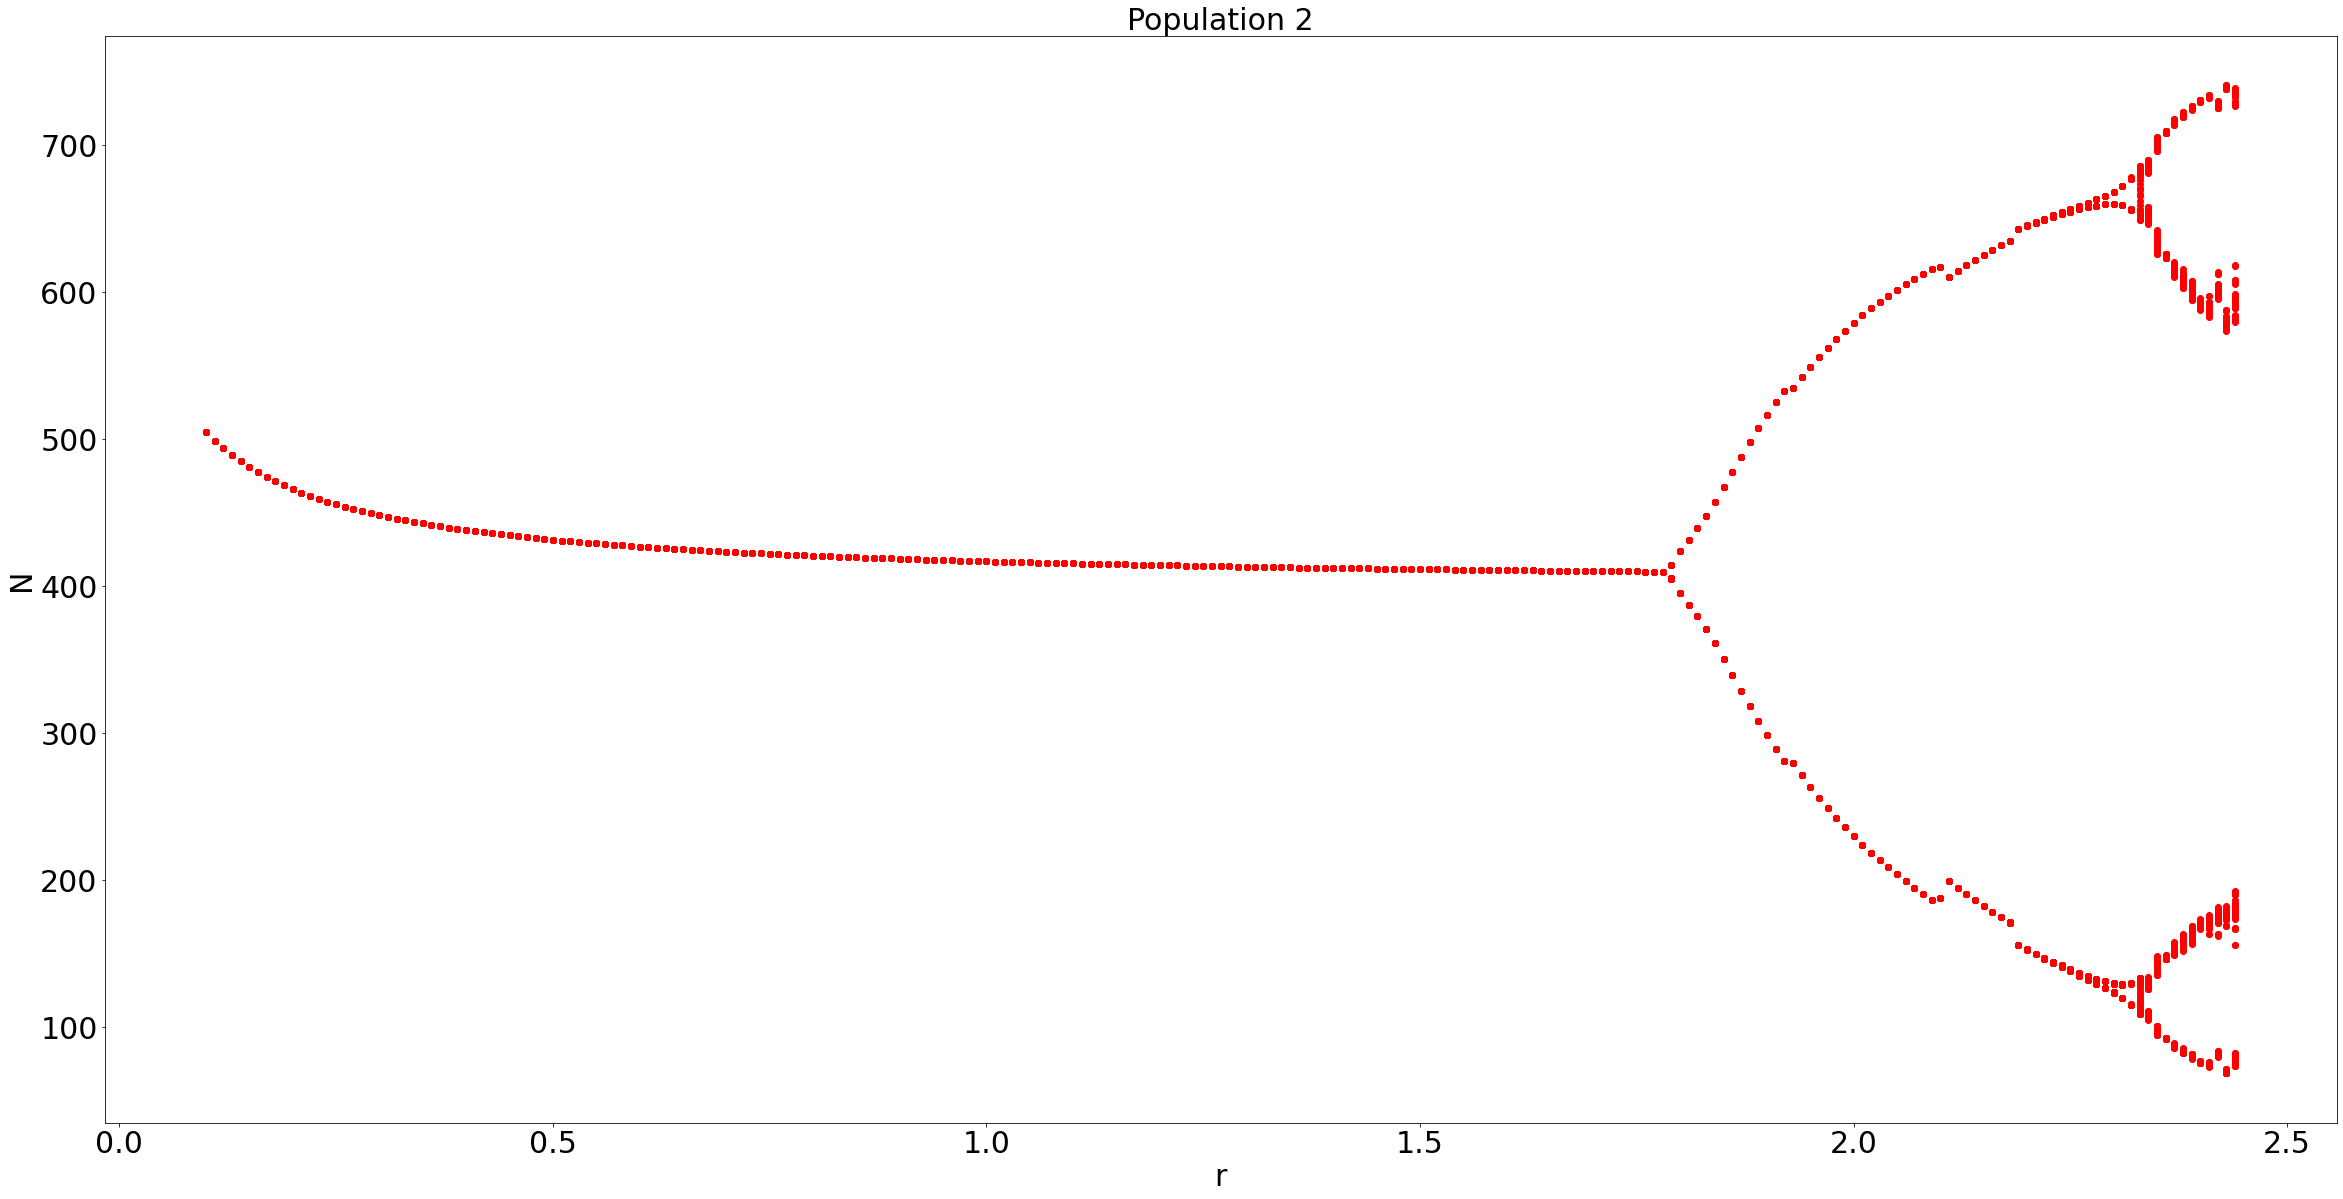

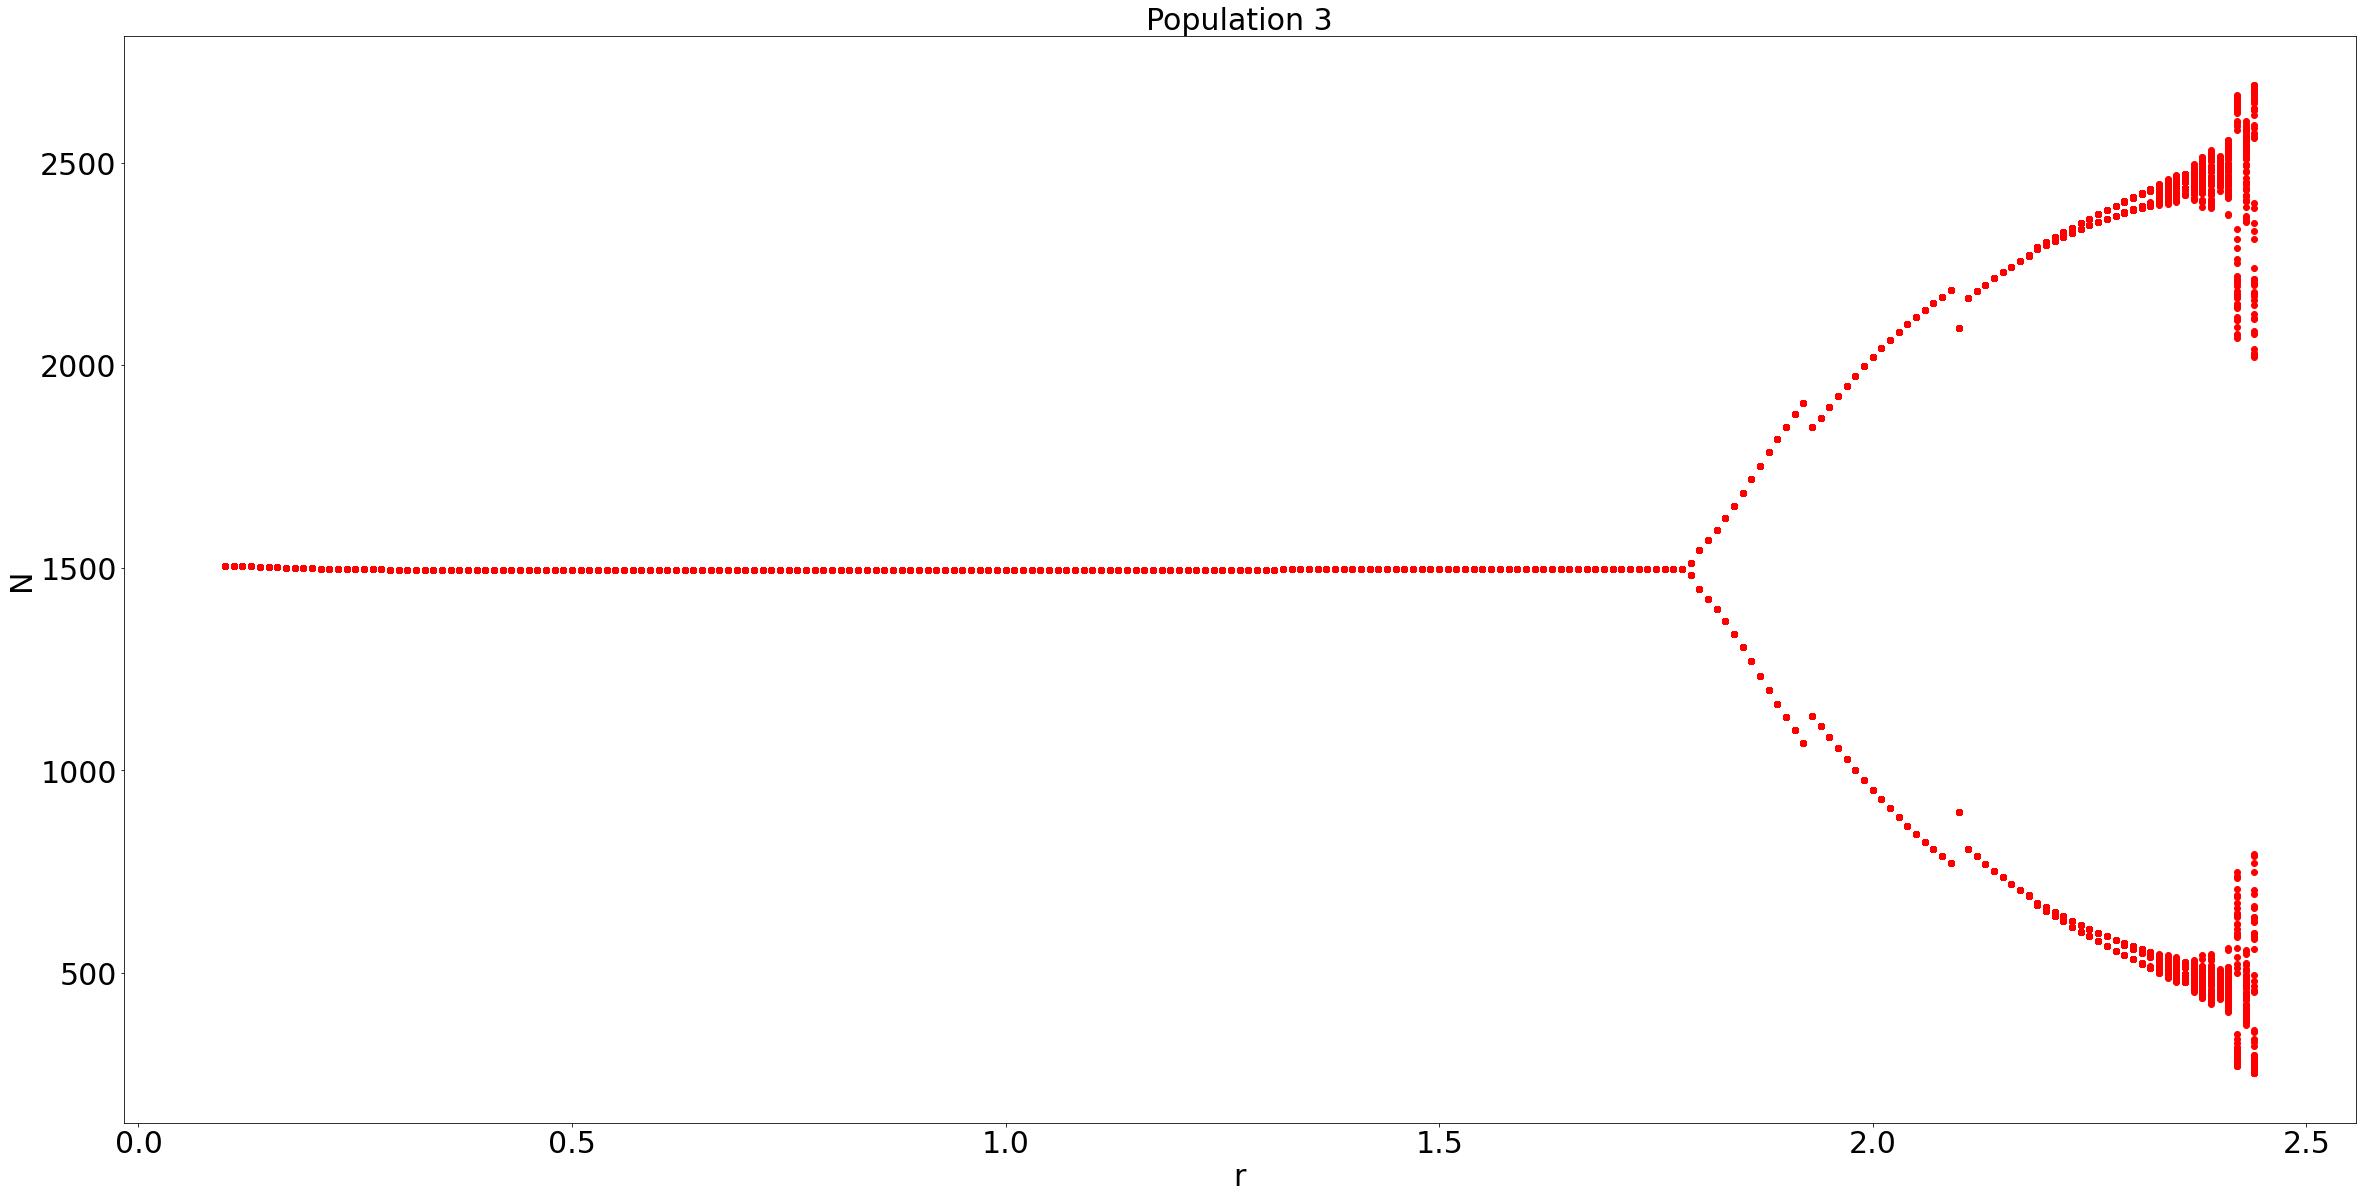

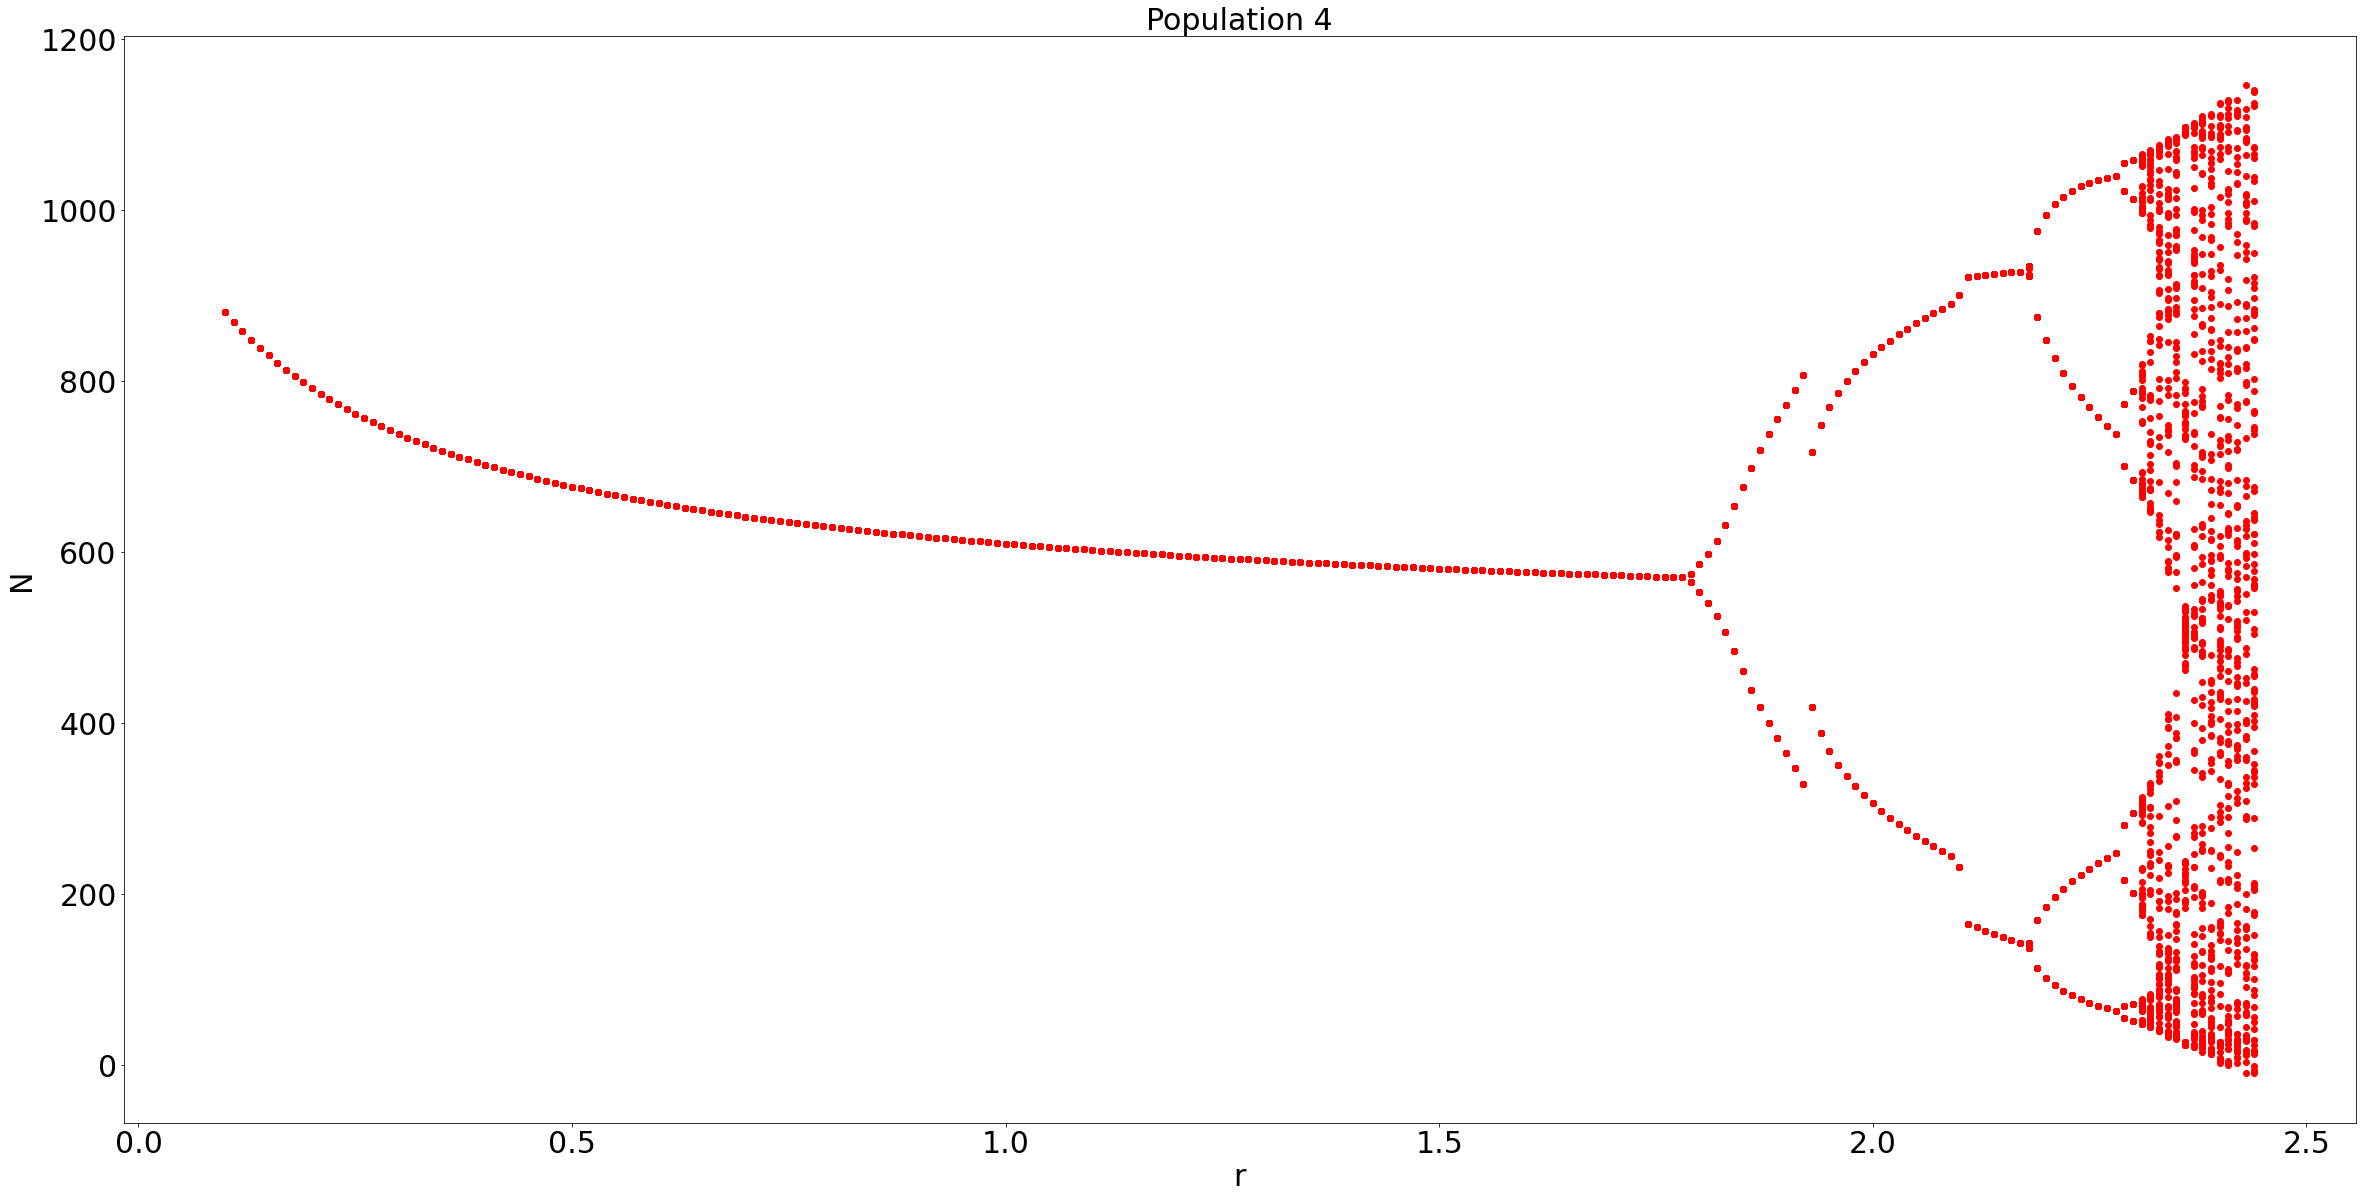

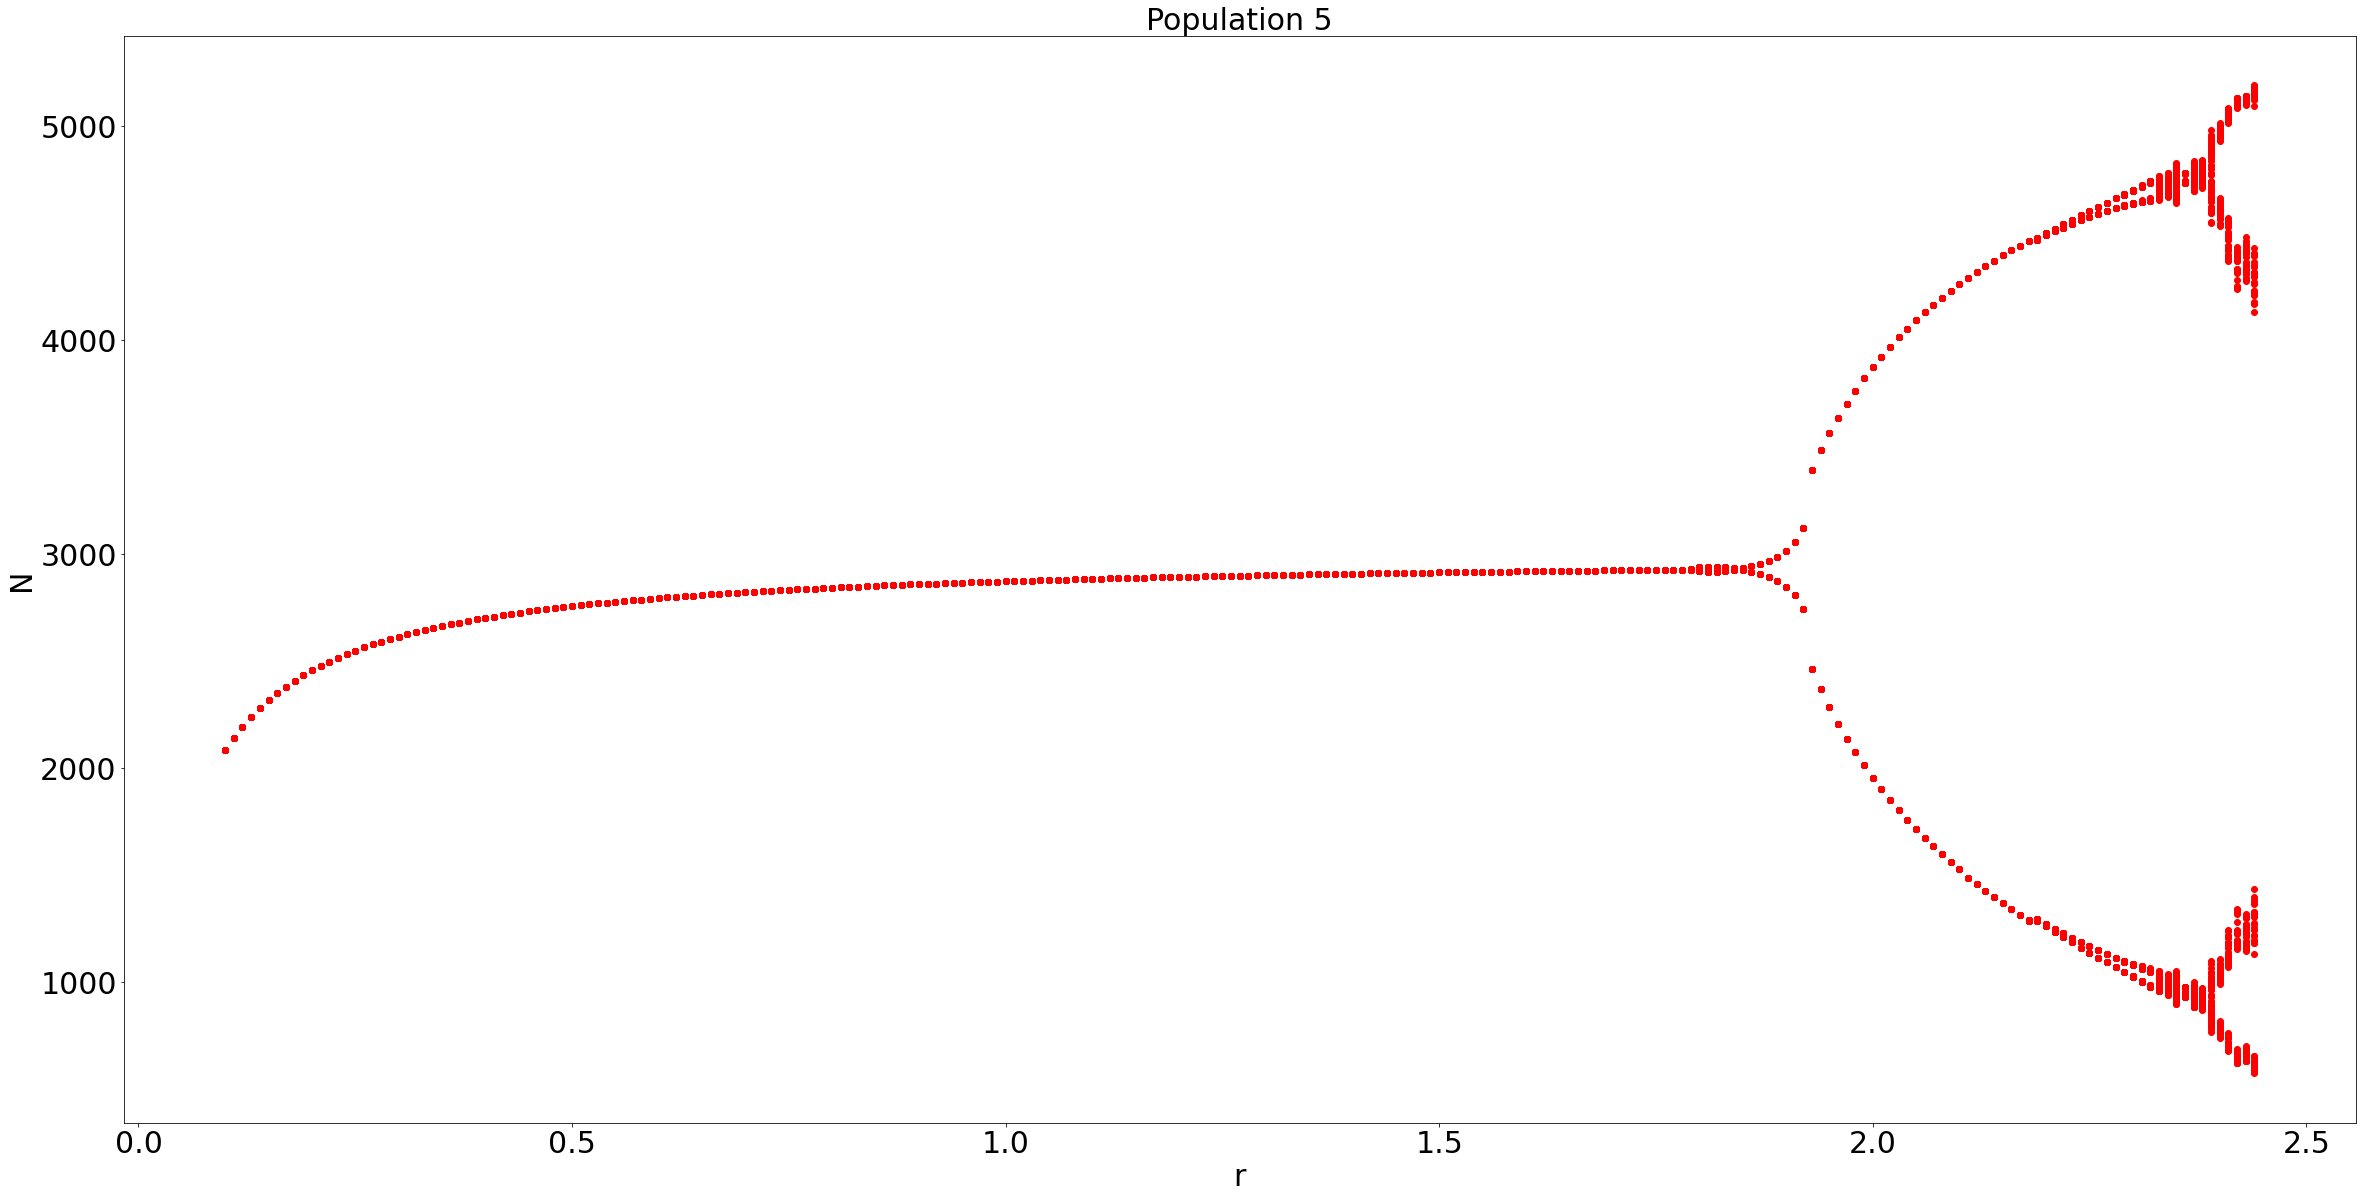

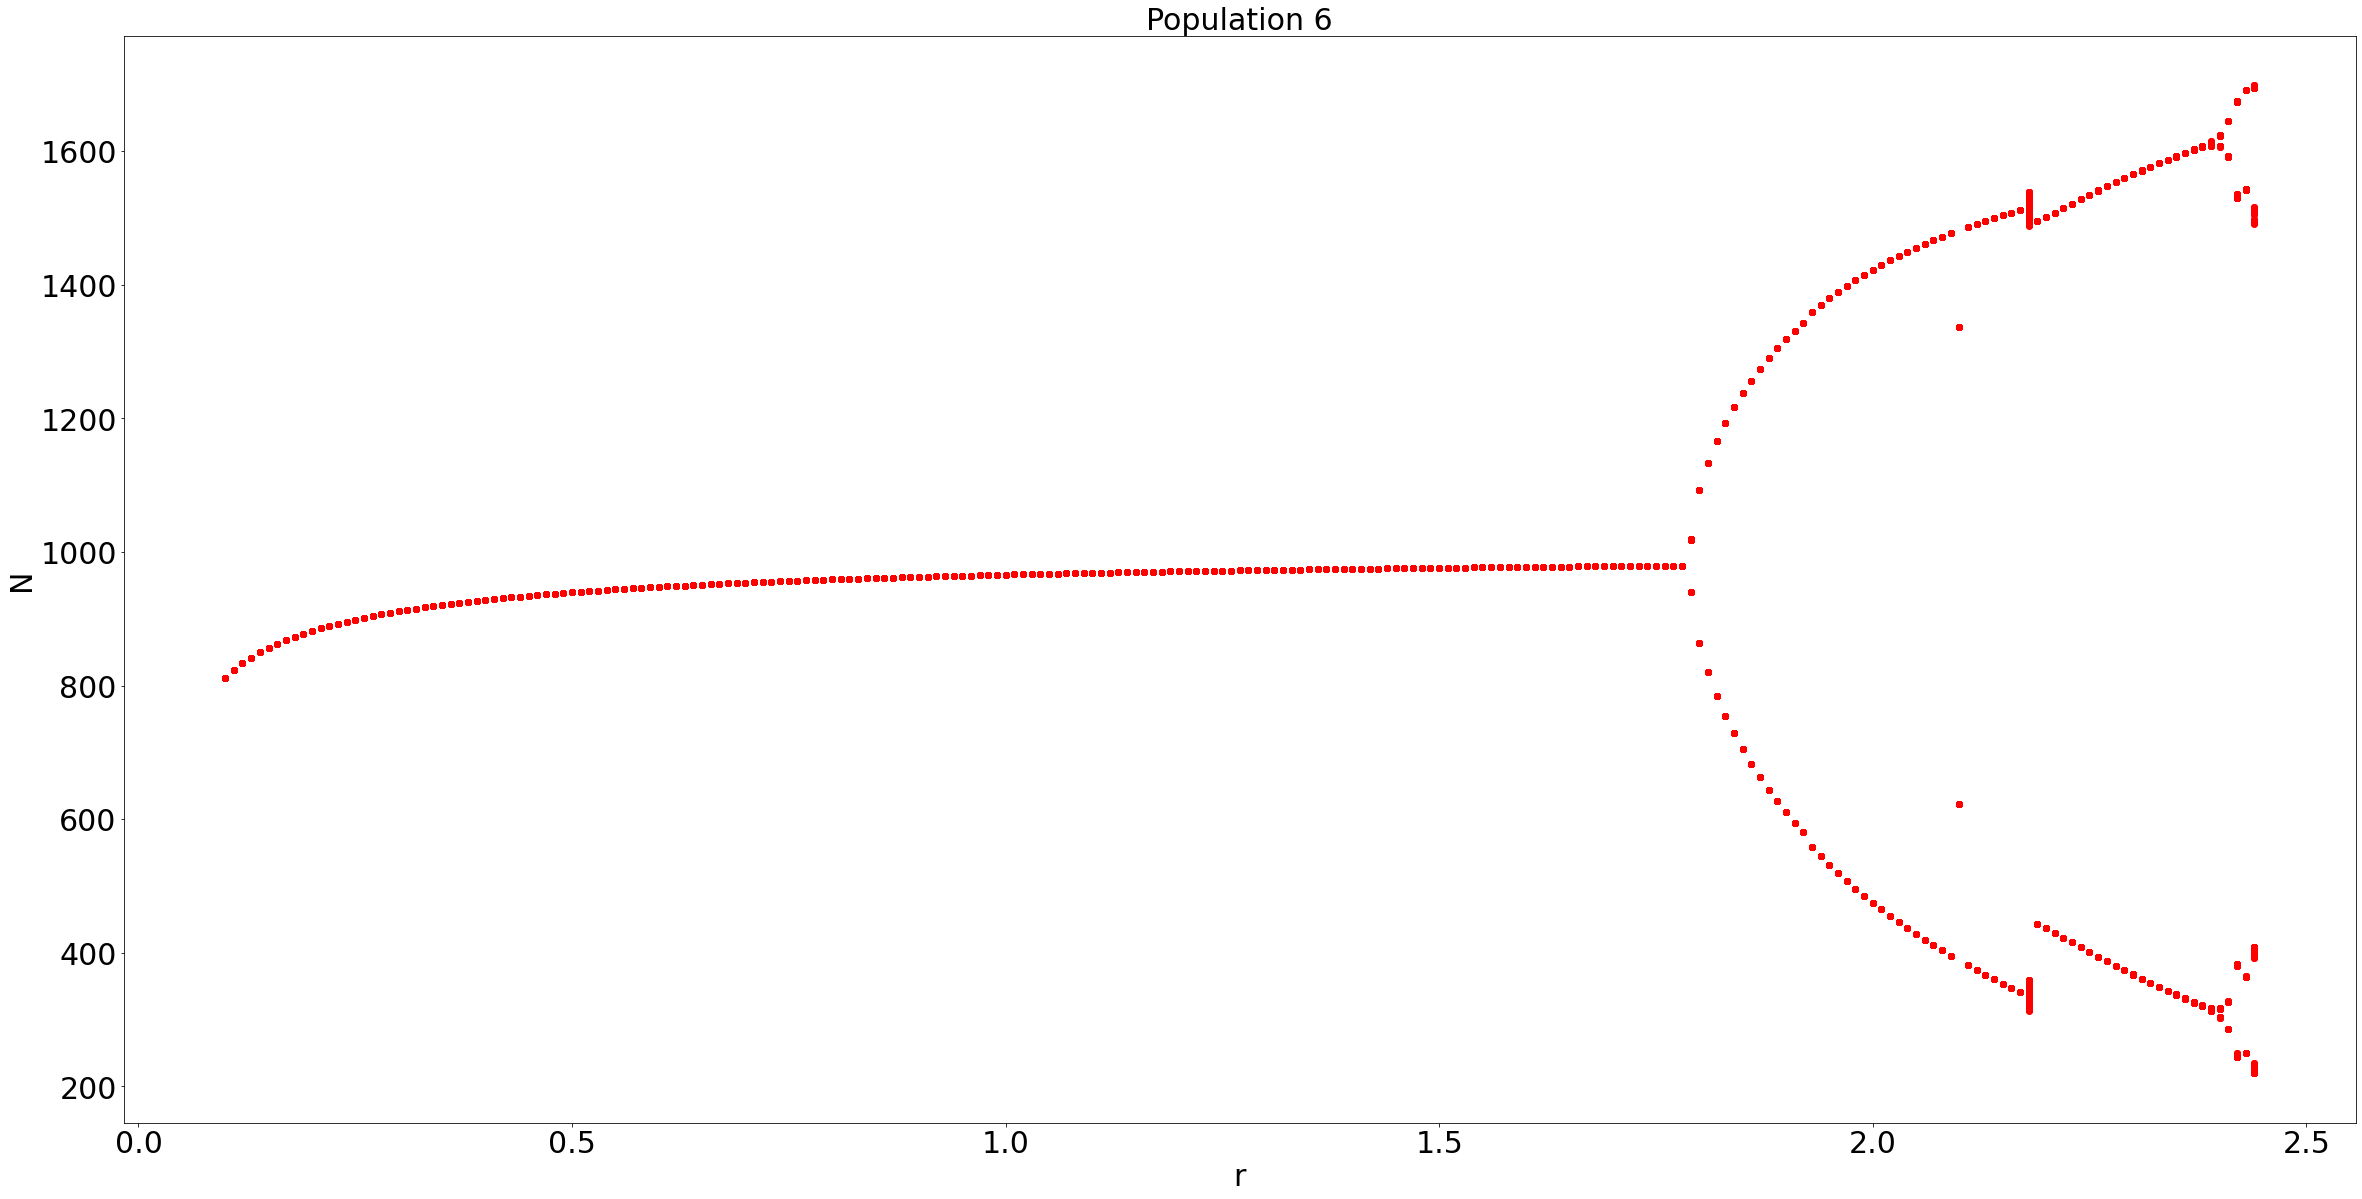

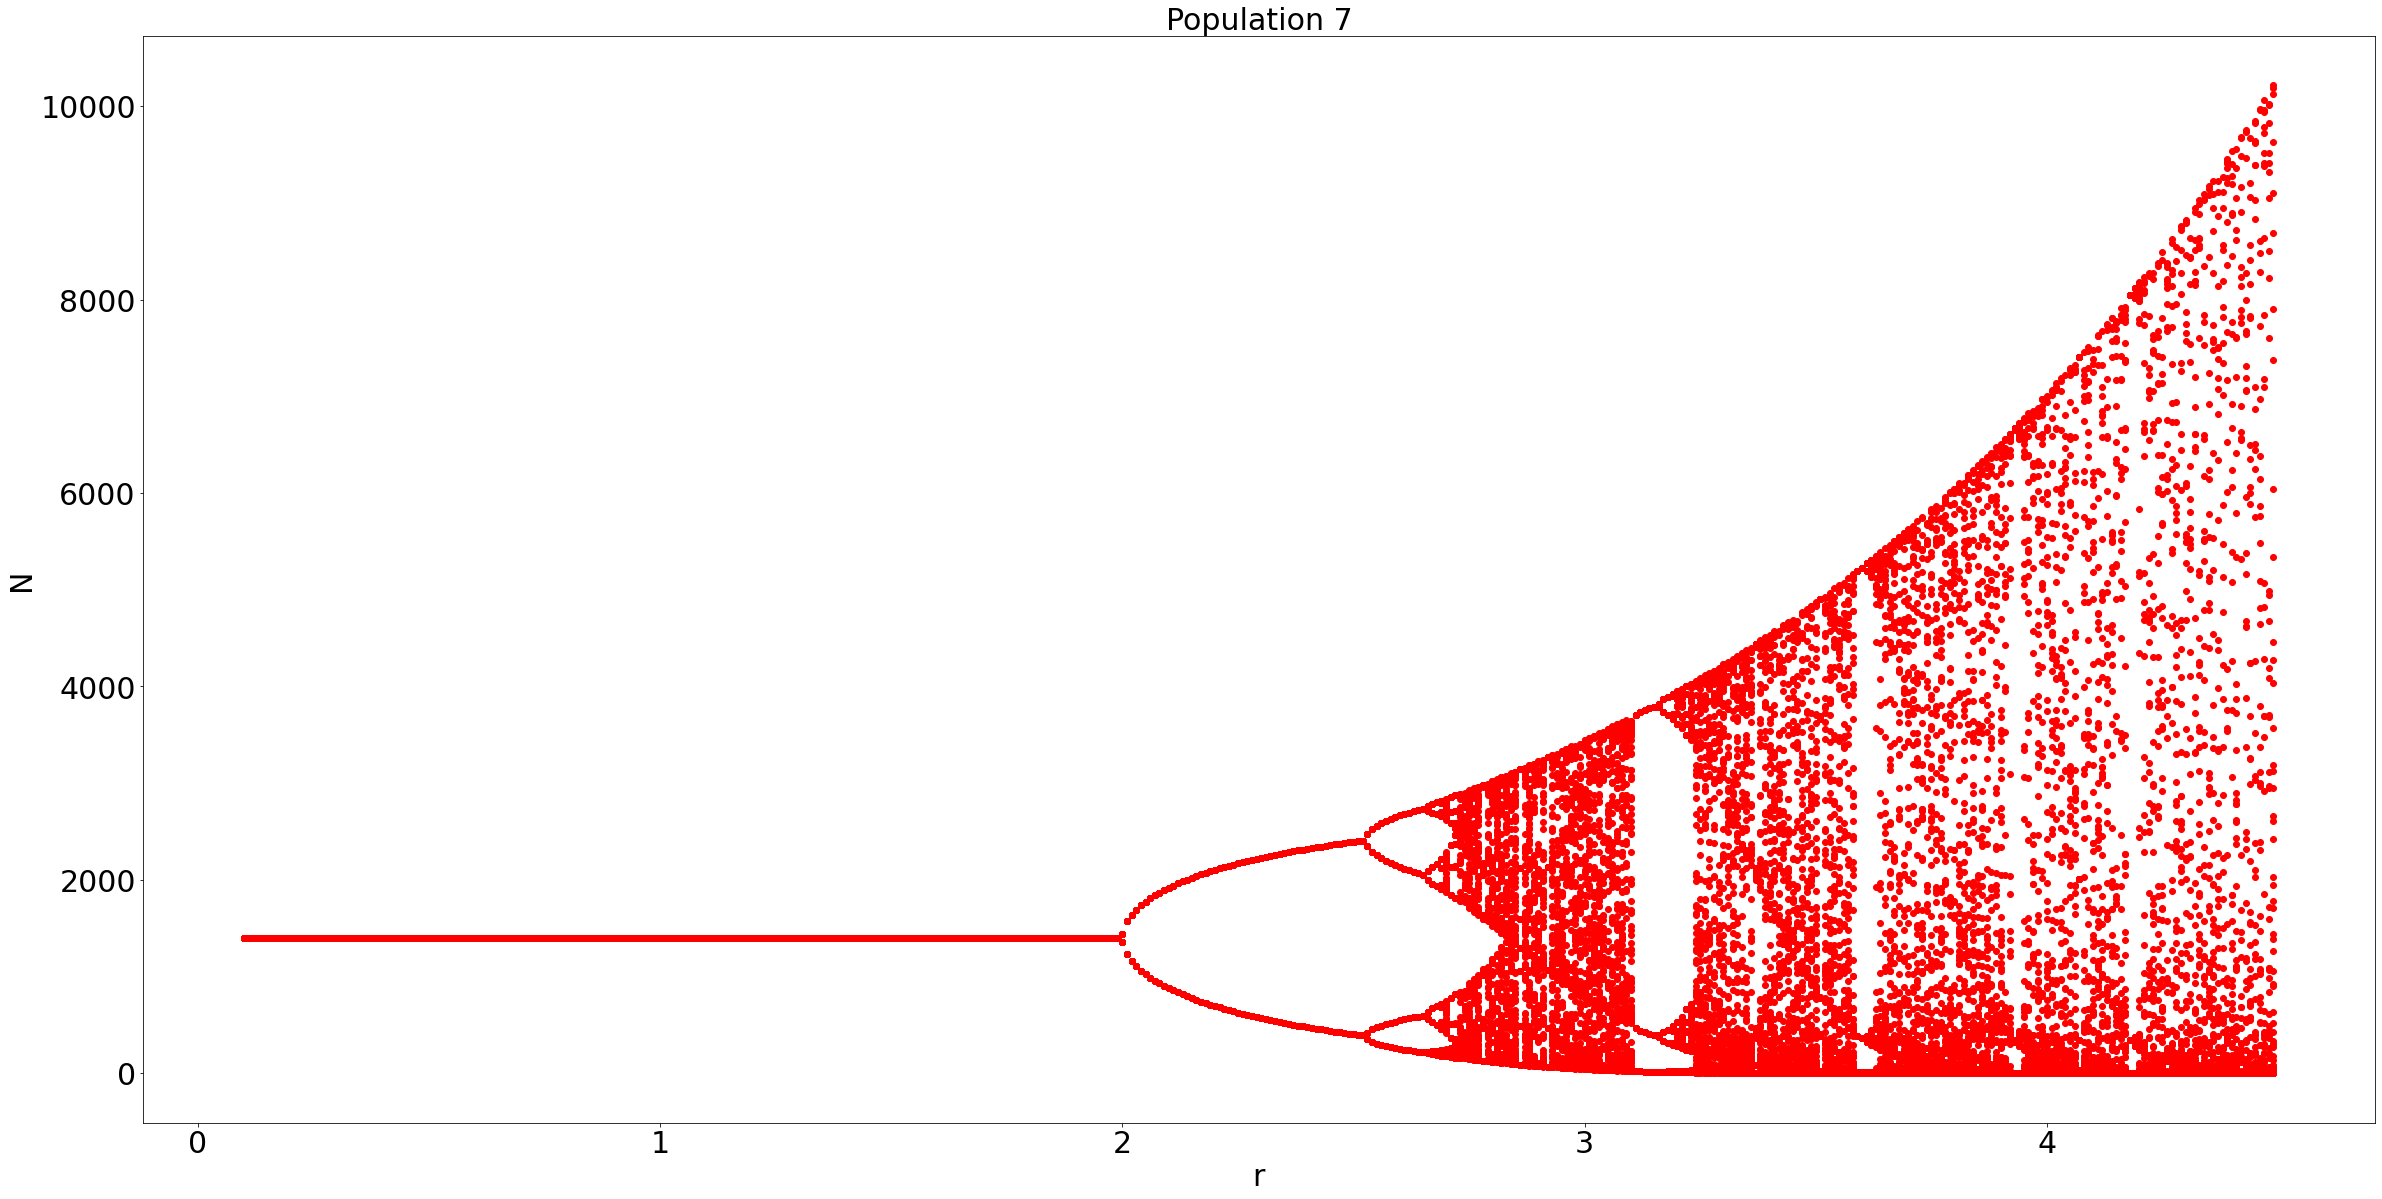

In [14]:
'''
Important instruction:- Don't forget to add new populations to pops list
'''
%matplotlib inline
P1 = Population(8, 800, 2)
P2 = Population(8, 400, 2)
P3 = Population(8, 1500, 2)
P4 = Population(8, 500, 2)
P5 = Population(8, 3000, 2)
P6 = Population(8, 1000, 2)
P7 = Population(20, 1400, 2)

P1.addRelation({P2:1, P5:2, P6:10}) #Max percentage of pop that can leave P1 and join P2 and P5 respectively
P2.addRelation({P1:2, P3:3})
P3.addRelation({P2:2, P4:4})
P4.addRelation({P3:4, P5:5})
P5.addRelation({P4:4, P1:2})
P6.addRelation({P1:7, P3:5})
# P7.addRelation({P1:4})

pops = [P1,P2,P3,P4,P5,P6,P7]
K= 500

completeHistory = getBifurcationDiagram(K,pops,4.5)